In [1]:
try:
    import saspy
except ImportError as e:
    print('Installing saspy')
    %pip install saspy

In [2]:
import pandas as pd
# The following imports are only necessary for automated sascfg_personal.py creation
from pathlib import Path
import os
from shutil import copyfile
import getpass

In [3]:
# Imports without the setup check codes
import saspy
import pandas as pd

# Set up your connection

The next cell contains code to check if you already have a sascfg_personal.py file in your current conda environment. If you do not one is created for you.

Next [choose your access method](https://sassoftware.github.io/saspy/install.html#choosing-an-access-method) and the read through the configuration properties in sascfg_personal.py

In [4]:
# Setup for the configuration file - for running inside of a conda environment
saspyPfad = f"C:\\Users\\{getpass.getuser()}\\.conda\\envs\\{os.environ['CONDA_DEFAULT_ENV']}\\Lib\\site-packages\\saspy\\"
saspycfg_personal = Path(f'{saspyPfad}sascfg_personal.py')
if saspycfg_personal.is_file():
    print('All setup and ready to go')
else:
    copyfile(f'{saspyPfad}sascfg.py', f'{saspyPfad}sascfg_personal.py')
    print('The configuration file was created for you, please setup your connection method')
    print(f'Find sascfg_personal.py here: {saspyPfad}')

All setup and ready to go


# Configuration
prod = {

    'iomhost': 'rfnk01-0068.exnet.sas.com', <-- SAS Host Name

    'iomport': 8591, <-- SAS Workspace Server Port
    
    'class_id': '440196d4-90f0-11d0-9f41-00a024bb830c', <-- static, if the value is wrong use proc iomoperate
    
    'provider': 'sas.iomprovider', <-- static
    
    'encoding': 'windows-1252' <-- Python encoding for SAS session encoding
    
}

In [5]:
# If no configuration name is specified, you get a list of the configured ones
# sas = saspy.SASsession(cfgname='prod')
sas = saspy.SASsession()

Please enter the name of the SAS Config you wish to run. Available Configs are: ['prod', 'dev'] prod
Username: sasdemo
Password: ········
SAS Connection established. Workspace UniqueIdentifier is 5A182D7A-E928-4CA9-8EC4-9BE60ECB2A79



# Explore some interactions with SAS
Getting a feeling for what SASPy can do.

In [6]:
# Let's take a quick look at all the different methods and variables provided by SASSession object
dir(sas)

['DISPLAY',
 'HTML',
 'HTML_Style',
 'SAS_EPOCH',
 'SASpid',
 'SYSERR',
 'SYSERRORTEXT',
 'SYSFILRC',
 'SYSINFO',
 'SYSLIBRC',
 'SYSWARNINGTEXT',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_asubmit',
 '_dsopts',
 '_endsas',
 '_expopts',
 '_getlog',
 '_getlst',
 '_getlsttxt',
 '_impopts',
 '_io',
 '_lastlog',
 '_loaded_macros',
 '_loadmacros',
 '_obj_cnt',
 '_objcnt',
 '_render_html_or_log',
 '_startsas',
 'assigned_librefs',
 'batch',
 'cat',
 'dataframe2sasdata',
 'datasets',
 'df2sd',
 'df_char_lengths',
 'dirlist',
 'disconnect',
 'download',
 'endsas',
 'exist',
 'file_copy',
 'file_delete',
 'file_info',
 'hostsep',
 'lastlog',
 'list_tables',
 '

In [7]:
# Get a list of all tables inside of the library sashelp
table_df = sas.list_tables(libref='sashelp', results='pandas')
# Search for a table containing a capital C in its name
table_df[table_df['MEMNAME'].str.contains('C')]

,MEMNAME,MEMTYPE
0,AACOMP,DATA
6,APPLIANC,DATA
7,ASSCMGR,DATA
18,CARS,DATA
19,CENTLOOKUP,DATA
...,...,...
280,VTABCON,VIEW
289,ZHC,DATA
290,ZIPCODE,DATA
292,ZTC,DATA


In [8]:
# If teach_me_sas is true instead of executing the code, we get the generated code returned
sas.teach_me_SAS(True)
sas.list_tables(libref='sashelp', results='pandas')
# Let's turn it off again to actually run the code
sas.teach_me_SAS(False)


        proc datasets dd=sashelp nodetails nolist noprint;
           contents memtype=(data view) nodetails 
              dir out=work._saspy_lib_list(keep=memname memtype) data=_all_ noprint;
        run;
        
        proc sql;
           create table work._saspy_lib_list as select distinct * from work._saspy_lib_list;
        quit;
        


In [9]:
# Create a sasdata object, based on the table cars in the sashelp library
cars = sas.sasdata('cars', 'sashelp')
# Get information about the columns in the table
cars.columnInfo()

,Member,Num,Variable,Type,Len,Pos,Format,Label
0,SASHELP.CARS,9.0,Cylinders,Num,8.0,24.0,,
1,SASHELP.CARS,5.0,DriveTrain,Char,5.0,147.0,,
2,SASHELP.CARS,8.0,EngineSize,Num,8.0,16.0,,Engine Size (L)
3,SASHELP.CARS,10.0,Horsepower,Num,8.0,32.0,,
4,SASHELP.CARS,7.0,Invoice,Num,8.0,8.0,DOLLAR8.,
5,SASHELP.CARS,15.0,Length,Num,8.0,72.0,,Length (IN)
6,SASHELP.CARS,11.0,MPG_City,Num,8.0,40.0,,MPG (City)
7,SASHELP.CARS,12.0,MPG_Highway,Num,8.0,48.0,,MPG (Highway)
8,SASHELP.CARS,6.0,MSRP,Num,8.0,0.0,DOLLAR8.,
9,SASHELP.CARS,1.0,Make,Char,13.0,80.0,,



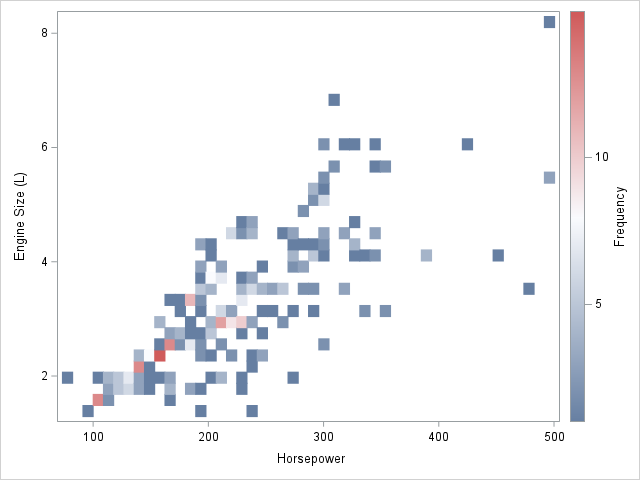

In [10]:
# Creating a simple heat map 
cars.heatmap('Horsepower', 'EngineSize')

In [11]:
# Clean up for this section
del cars, table_df

# Reading in data from local disc with Pandas and uploading it to SAS
1. First we are going to read in a local csv file
2. Creating a copy of the base data file in SAS
3. Append the local data to the data stored in SAS and sort it

The Opel data set:

Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Opel,Astra Edition,Sedan,Europe,Rear,28495,26155,3,6,22.5,16,23,4023,110,180
Opel,Astra Design & Tech,Sedan,Europe,Rear,30795,28245,4.4,8,32.5,16,22,4824,111,184
Opel,Astra Elegance,Sedan,Europe,Rear,37995,34800,2.5,6,18.4,20,29,3219,107,176
Opel,Astra Ultimate,Sedan,Europe,Rear,42795,38245,2.5,6,18.4,20,29,3197,107,177
Opel,Astra Business Edition,Sedan,Europe,Rear,28495,24800,2.5,6,18.4,19,27,3560,107,177
Opel,Astra Elegance,Sedan,Europe,Rear,30245,27745,2.5,6,18.4,19,27,3461,107,176

In [12]:
# Read a local csv file with pandas and take a look
opel = pd.read_csv('cars_opel.csv')
opel.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,33136.666667,29998.333333,2.900000,6.333333,21.433333,18.333333,26.166667,3714.00000,108.166667,178.333333
std,5896.135740,5310.538265,0.761577,0.816497,5.664156,1.861899,2.994439,620.90579,1.834848,3.141125
min,28495.000000,24800.000000,2.500000,6.000000,18.400000,16.000000,22.000000,3197.00000,107.000000,176.000000
25%,28932.500000,26552.500000,2.500000,6.000000,18.400000,16.750000,24.000000,3279.50000,107.000000,176.250000
50%,30520.000000,27995.000000,2.500000,6.000000,18.400000,19.000000,27.000000,3510.50000,107.000000,177.000000
75%,36195.000000,33161.250000,2.875000,6.000000,21.475000,19.750000,28.500000,3907.25000,109.250000,179.250000
max,42795.000000,38245.000000,4.400000,8.000000,32.500000,20.000000,29.000000,4824.00000,111.000000,184.000000


In [13]:
# Looks like the horsepower isn't right, let's fix that
opel.loc[:, 'Horsepower'] *= 10
opel.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,33136.666667,29998.333333,2.900000,6.333333,214.333333,18.333333,26.166667,3714.00000,108.166667,178.333333
std,5896.135740,5310.538265,0.761577,0.816497,56.641563,1.861899,2.994439,620.90579,1.834848,3.141125
min,28495.000000,24800.000000,2.500000,6.000000,184.000000,16.000000,22.000000,3197.00000,107.000000,176.000000
25%,28932.500000,26552.500000,2.500000,6.000000,184.000000,16.750000,24.000000,3279.50000,107.000000,176.250000
50%,30520.000000,27995.000000,2.500000,6.000000,184.000000,19.000000,27.000000,3510.50000,107.000000,177.000000
75%,36195.000000,33161.250000,2.875000,6.000000,214.750000,19.750000,28.500000,3907.25000,109.250000,179.250000
max,42795.000000,38245.000000,4.400000,8.000000,325.000000,20.000000,29.000000,4824.00000,111.000000,184.000000


In [14]:
# Create a working copy of the cars data set
sas.submitLOG('''data work.cars; set sashelp.cars; run;''')

16                                                         The SAS System                               14:40 Monday, April 19, 2021

101        
102                        ods listing close;
103                        ods html5 (id=saspy_internal) options(bitmap_mode='inline')
104                            file="D:\opt\sasinside\SASWORK\_TD26692_SAS-AAP_\Prc2\saspy_results.html"
105                            device=svg
106                            style=HTMLBlue;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: D:\opt\sasinside\SASWORK\_TD26692_SAS-AAP_\Prc2\saspy_results.html
107                        ods graphics on / outputfmt=png;
108                    ;*';*";*/;quit;run;
108      !                                data work.cars; set sashelp.cars; run;

NOTE: There were 428 observations read from the data set SASHELP.CARS.
NOTE: The data set WORK.CARS has 428 observations and 15 variables.
NOTE: DATA statement used (Total process time):
      real time           0.01 seconds
 

In [15]:
# Append the panda dataframe to the working copy of the cars data set in SAS
cars = sas.sasdata('cars', 'work')
# The pandas data frame is appended to the SAS data set
cars.append(opel)
cars.tail()

22                                                         The SAS System                               14:40 Monday, April 19, 2021

135        ;*';*";*/;quit;run;
135      !                    proc append base=work.'cars'n
136                    data=WORK.'_temp_df'n;
137        run;

NOTE: Appending WORK._TEMP_DF to WORK.CARS.
NOTE: There were 6 observations read from the data set WORK._TEMP_DF.
NOTE: 6 observations added.
NOTE: The data set WORK.CARS has 434 observations and 15 variables.
NOTE: PROCEDURE APPEND used (Total process time):
      real time           0.01 seconds
      cpu time            0.01 seconds
      
137      !     ;*';*";*/;quit;run;




,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Opel,Astra Design & Tech,Sedan,Europe,Rear,30795.0,28245.0,4.4,8.0,325.0,16.0,22.0,4824.0,111.0,184.0
1,Opel,Astra Elegance,Sedan,Europe,Rear,37995.0,34800.0,2.5,6.0,184.0,20.0,29.0,3219.0,107.0,176.0
2,Opel,Astra Ultimate,Sedan,Europe,Rear,42795.0,38245.0,2.5,6.0,184.0,20.0,29.0,3197.0,107.0,177.0
3,Opel,Astra Business Edition,Sedan,Europe,Rear,28495.0,24800.0,2.5,6.0,184.0,19.0,27.0,3560.0,107.0,177.0
4,Opel,Astra Elegance,Sedan,Europe,Rear,30245.0,27745.0,2.5,6.0,184.0,19.0,27.0,3461.0,107.0,176.0


In [16]:
# Sort the data set in SAS to restore the old order
cars.sort('make model type')
cars.tail()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Volvo,S80 2.9 4dr,Sedan,Europe,Front,37730.0,35542.0,2.9,6.0,208.0,20.0,28.0,3576.0,110.0,190.0
1,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
2,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0
3,Volvo,XC70,Wagon,Europe,All,35145.0,33112.0,2.5,5.0,208.0,20.0,27.0,3823.0,109.0,186.0
4,Volvo,XC90 T6,SUV,Europe,All,41250.0,38851.0,2.9,6.0,268.0,15.0,20.0,4638.0,113.0,189.0



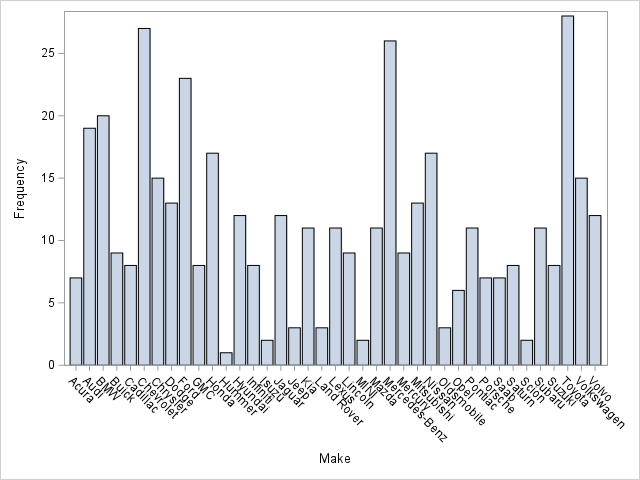

In [17]:
# Confirm that Opel has been added
cars.bar('Make')

# Reading in data from SAS and manipulating it with Pandas

In [18]:
# Short form is sd2df()
df = sas.sasdata2dataframe('cars', 'sashelp', dsopts={'where': 'make="BMW"'})
type(df)

pandas.core.frame.DataFrame

Now that the data set is available as a Pandas DataFrame you can use it in e.g. a sklearn pipeline

In [19]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,BMW,X3 3.0i,SUV,Europe,All,37000.0,33873.0,3.0,6.0,225.0,16.0,23.0,4023.0,110.0,180.0
1,BMW,X5 4.4i,SUV,Europe,All,52195.0,47720.0,4.4,8.0,325.0,16.0,22.0,4824.0,111.0,184.0
2,BMW,325i 4dr,Sedan,Europe,Rear,28495.0,26155.0,2.5,6.0,184.0,20.0,29.0,3219.0,107.0,176.0
3,BMW,325Ci 2dr,Sedan,Europe,Rear,30795.0,28245.0,2.5,6.0,184.0,20.0,29.0,3197.0,107.0,177.0
4,BMW,325Ci convertible 2dr,Sedan,Europe,Rear,37995.0,34800.0,2.5,6.0,184.0,19.0,27.0,3560.0,107.0,177.0
5,BMW,325xi 4dr,Sedan,Europe,All,30245.0,27745.0,2.5,6.0,184.0,19.0,27.0,3461.0,107.0,176.0
6,BMW,330i 4dr,Sedan,Europe,Rear,35495.0,32525.0,3.0,6.0,225.0,20.0,30.0,3285.0,107.0,176.0
7,BMW,330Ci 2dr,Sedan,Europe,Rear,36995.0,33890.0,3.0,6.0,225.0,20.0,30.0,3285.0,107.0,176.0
8,BMW,330xi 4dr,Sedan,Europe,All,37245.0,34115.0,3.0,6.0,225.0,20.0,29.0,3483.0,107.0,176.0
9,BMW,525i 4dr,Sedan,Europe,Rear,39995.0,36620.0,2.5,6.0,184.0,19.0,28.0,3428.0,114.0,191.0


# Creating a model
The data can be found [here](https://www.kaggle.com/gsr9099/best-model-for-credit-card-approval)

In [20]:
# Read two local csv files
df_applications = pd.read_csv('application_record.csv')
df_credit = pd.read_csv('credit_record.csv')

In [21]:
# Get a feel for the data
print(df_applications.columns)
print(df_applications.head(5))
df_applications.describe()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher educ

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [22]:
# Join the two data sets together
df_application_credit = df_applications.join(df_credit, lsuffix='_applications', rsuffix='_credit')
print(df_application_credit.head())
df_application_credit.columns

   ID_applications CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0          5008804           M            Y               Y             0   
1          5008805           M            Y               Y             0   
2          5008806           M            Y               Y             0   
3          5008808           F            N               Y             0   
4          5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  ...  DAYS_EMPLOYED  FLAG_MOBIL  \
0 

Index(['ID_applications', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ID_credit', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [23]:
# Upload the data to the SAS server
# Here just a small sample, as the data set is quite large and the data is pre-loaded on SAS server
sas.df2sd(df_application_credit[:10], table='application_credit_sample', libref='saspy')

Libref  = saspy
Table   = application_credit_sample
Dsopts  = {}
Results = Pandas

In [24]:
# Create a training data set and test data set in SAS
application_credit_sas = sas.sasdata('application_credit', 'saspy')
application_credit_part = application_credit_sas.partition(fraction=.7, var='status')
application_credit_part.info()

,Variable,type,N,Nmiss
0,STATUS,char,777715.0,0.0
1,CODE_GENDER,char,777715.0,0.0
2,FLAG_OWN_CAR,char,777715.0,0.0
3,FLAG_OWN_REALTY,char,777715.0,0.0
4,NAME_INCOME_TYPE,char,777715.0,0.0
5,NAME_EDUCATION_TYPE,char,777715.0,0.0
6,NAME_FAMILY_STATUS,char,777715.0,0.0
7,NAME_HOUSING_TYPE,char,777715.0,0.0
8,OCCUPATION_TYPE,char,777715.0,240048.0
9,ID,numeric,777715.0,0.0


In [25]:
# Creating a SAS/STAT object
stat = sas.sasstat()
dir(stat)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'factor',
 'glm',
 'hplogistic',
 'hpreg',
 'hpsplit',
 'logger',
 'logistic',
 'mixed',
 'phreg',
 'reg',
 'sas',
 'sasproduct',
 'tpspline',
 'ttest']

In [26]:
# Target
target = 'status'
# Class Variables 
var_class = ['FLAG_OWN_CAR','FLAG_OWN_REALTY', 'OCCUPATION_TYPE', 'STATUS']

The HPSPLIT procedure is a high-performance procedure that builds tree-based statistical models for classification and regression. The procedure produces classification trees, which model a categorical response, and regression trees, which model a continuous response. Both types of trees are referred to as decision trees because the model is expressed as a series of if-then statements - [documentation](https://support.sas.com/documentation/onlinedoc/stat/141/hpsplit.pdf)

In [27]:
hpsplit_model = stat.hpsplit(data=application_credit_part, 
                             cls=var_class, 
                             model="status(event='N')= FLAG_OWN_CAR FLAG_OWN_REALTY OCCUPATION_TYPE MONTHS_BALANCE AMT_INCOME_TOTAL", 
                             code='trescore.sas', 
                             procopts='assignmissing=similar', 
                             out = 'work.dt_score',
                             id = "ID",
                             partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")

In [28]:
dir(hpsplit_model)

['CONFUSIONMATRIX',
 'DATAACCESSINFO',
 'LOG',
 'MODELINFO',
 'NOBS',
 'PERFORMANCEINFO',
 'PRUNINGPLOT',
 'ROCPLOT',
 'TREEPERFORMANCE',
 'VARIMPORTANCE',
 'WHOLETREEPLOT',
 'ZOOMEDTREEPLOT']


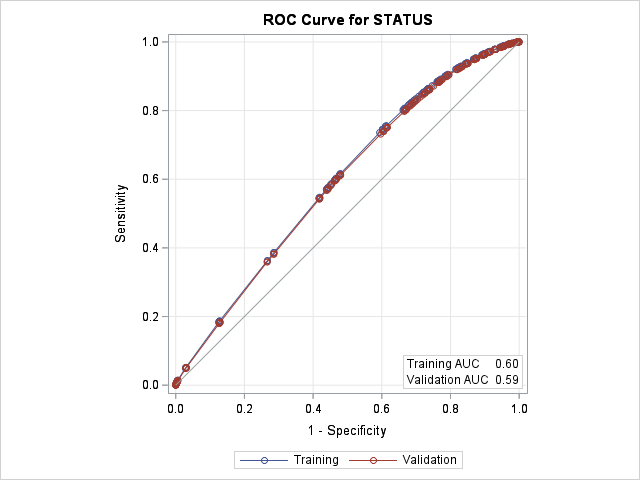

In [29]:
hpsplit_model.ROCPLOT

In [30]:
hpsplit_model.varimportance

,Variable,RelativeImportance,SSEImportance,ValidRelImport,ValidSSEImport,ImportanceRatio,Count
0,MONTHS_BALANCE,1.000000,82.357285,1.000000,52.802338,1.000000,18.0
1,AMT_INCOME_TOTAL,0.436770,35.971207,0.404491,21.358092,0.926097,117.0
2,OCCUPATION_TYPE,0.400614,32.993451,0.364417,19.242077,0.909647,93.0
3,FLAG_OWN_CAR,0.161304,13.284582,0.154406,8.152974,0.957232,16.0
4,FLAG_OWN_REALTY,0.187016,15.402159,0.136320,7.198037,0.728922,24.0



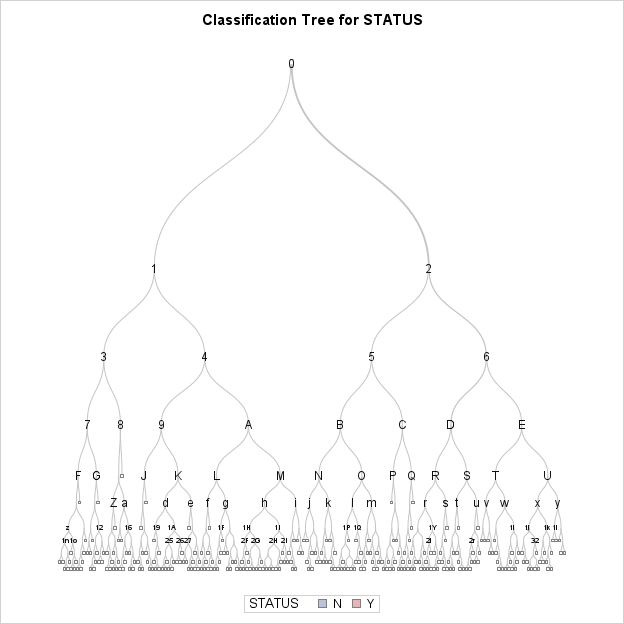

In [31]:
sas.set_results('HTML')
hpsplit_model.wholetreeplot